ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO DE DATOS
--------------------

In [1]:
import pandas as pd

In [2]:
#Carga de datos
df_viviendas = pd.read_json('./../../DATA/viviendas_madrid_.json')
df_viviendas

,title,price,location,rooms,surface,bathrooms,Aire acondicionado:,Tipo de inmueble:,Año de construcción:,Planta:,Año reforma edificio:,Calefacción:,Jardín:,Ascensor:
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,None,None
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,None,None
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,Privado,None
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),None,None
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,Box/plaza de garaje en venta en Fuencarral,6000,"Fuencarral - Tres Olivos - Virgen De Begoña, M...",NaN,9,NaN,None,Media,1970.0,None,NaN,None,None,None
1933,Casa en venta en Humanes De Madrid,390000,Humanes De Madrid,5.0,328,NaN,None,Señorial,2003.0,None,NaN,None,None,None
1934,Box/plaza de garaje en venta en Centro - Escri...,6900,"Centro, Leganés",NaN,10,NaN,None,Media,1989.0,None,NaN,None,None,None
1935,Box/plaza de garaje en venta en Centro - Escri...,7200,"Centro, Leganés",NaN,15,1.0,None,Popular,1995.0,Sótano,NaN,None,None,None


In [3]:
#Se eliminan los datos de las cocheras y locales, ya que buscamos viviendas
df_no_viviendas = df_viviendas[df_viviendas['title'].str.startswith('Box') |
                               df_viviendas['title'].str.startswith('Local')]
indices_a_eliminar = df_no_viviendas.index
df_viviendas.drop(indices_a_eliminar, inplace = True)

In [4]:
#Renombrar columnas o campos del DataFrame
nombres_columnas = {'Aire acondicionado:': 'air conditioning',
                    'Tipo de inmueble:' : 'property type',
                    'Año de construcción:': 'year built',
                    'Planta:' : 'floor',
                    'Año reforma edificio:': 'building reform',
                    'Calefacción:' : 'heating',
                    'Jardín:' : 'garden',
                    'Ascensor:' : 'lift'}

df_viviendas = df_viviendas.rename(columns = nombres_columnas)
df_viviendas.head()

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,None,None
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,None,None
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,Privado,None
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),None,None
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),None,None


In [5]:
#Obtener información de cada campo del DataFrame
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1933
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1562 non-null   object 
 1   price             1562 non-null   int64  
 2   location          1562 non-null   object 
 3   rooms             1485 non-null   float64
 4   surface           1562 non-null   int64  
 5   bathrooms         1416 non-null   float64
 6   air conditioning  546 non-null    object 
 7   property type     1561 non-null   object 
 8   year built        1419 non-null   float64
 9   floor             946 non-null    object 
 10  building reform   59 non-null     float64
 11  heating           879 non-null    object 
 12  garden            46 non-null     object 
 13  lift              496 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 183.0+ KB


In [6]:
"""
Se eliminan los datos de las viviendas que no presentan datos sobre los baños, habitaciones,
tipo de propiedad y año de construcción
"""
df_viviendas = df_viviendas.dropna(subset=['bathrooms', 'rooms', 'property type', 'year built'])

A continuación, veremos la distribución de los campos de tipo objeto
---------
--------------------------------------------------------------------------

In [7]:
df_viviendas['heating'].value_counts()

Independiente (Gas)                                              325
Independiente                                                     86
Independiente (Eléctrica)                                         69
centralizada (Gas)                                                65
centralizada                                                      54
Independiente (Radiadores)                                        27
centralizada (A Gasoil)                                           22
Independiente (Gas, Radiadores)                                   11
Independiente (A Gasoil)                                          10
centralizada (Radiadores)                                          6
Independiente (Fan Coil)                                           4
Independiente (Chimenea, Gas)                                      3
centralizada (Gas, Radiadores)                                     3
centralizada (Eléctrica)                                           3
centralizada (Chimenea)           

In [8]:
df_viviendas['air conditioning'].value_counts()

Independiente (Frío / Calor)              206
Independiente                             101
Independiente (A Techo)                    21
Centralizada (Frío / Calor)                18
Independiente (Frío / Calor, A Techo)      15
Centralizada                               11
Independiente (Fan Coil)                    4
Centralizada (Frío / Calor, A Techo)        4
Independiente (Predisposición)              2
Independiente (Frío / Calor, Fan Coil)      2
Centralizada (A Techo)                      1
Name: air conditioning, dtype: int64

In [9]:
df_viviendas['property type'].value_counts()

Popular     648
Media       407
Señorial    158
De época     30
Name: property type, dtype: int64

In [10]:
df_viviendas['garden'].value_counts()

Privado    37
Name: garden, dtype: int64

In [11]:
df_viviendas['garden'] = df_viviendas['garden'].notna().astype(int)
df_viviendas['garden'].fillna(0, inplace = True)

In [12]:
df_viviendas['lift'].value_counts()

Sí    338
Name: lift, dtype: int64

In [13]:
df_viviendas['lift'] = df_viviendas['lift'].notna().astype(int)
df_viviendas['lift'].fillna(0, inplace = True)

In [14]:
df_viviendas['floor'].value_counts()

1                        101
Baja                      84
2                         77
3                         66
Media                     58
4                         38
2 (planta media)          30
1 (planta media)          29
3 (planta media)          26
Alta                      23
4 (planta alta)           18
5                         16
3 (planta alta)           14
1 (planta baja)           12
5 (planta alta)           12
6                         12
Planta baja               11
4 (planta media)           8
6 (planta alta)            8
5 (planta media)           7
7 (planta alta)            6
7                          6
9                          6
Ático                      5
9 (planta alta)            4
8                          4
3 (planta ático)           3
2 (planta alta)            3
3 (planta baja)            3
2 (planta baja)            3
12                         2
8 (planta alta)            2
1 (planta alta)            2
6 (planta ático)           2
14            

In [15]:
df_viviendas['location'].value_counts()

Madrid                                               47
Loeches                                              30
Parla                                                30
Lavapiés - Embajadores, Madrid                       26
Torrejón De Ardoz                                    25
                                                     ..
Arganzuela, Acacias - Legazpi, Madrid                 1
Carabanchel, Marque De Vadillo - Comillas, Madrid     1
Pezuela De Las Torres                                 1
San Isidro, Getafe                                    1
Tetuán, Berruguete, Madrid                            1
Name: location, Length: 195, dtype: int64

In [16]:
#Se eliminan las viviendas que son pisos de los cuales no tenemos referencia de la planta en la que se encuentran
df_viviendas = df_viviendas[~(df_viviendas['title'].str.startswith('Piso') & (df_viviendas['floor'].isna()))]
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,None,Señorial,1975.0,5,NaN,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,None,Señorial,1975.0,3,NaN,None,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,None,Media,2019.0,Media,NaN,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,None,Media,1977.0,None,NaN,centralizada (A Gasoil),0,0


In [17]:
#Las viviendas que no tienen referencia sobre la planta en la que se encuentran son casas, y le ponemos planta 0
df_viviendas['floor'].fillna(0, inplace = True)
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,0,NaN,None,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,0,NaN,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,None,Señorial,1975.0,5,NaN,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,None,Señorial,1975.0,3,NaN,None,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,None,Media,2019.0,Media,NaN,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,None,Media,1977.0,0,NaN,centralizada (A Gasoil),0,0


In [18]:
#Generalizamos la distribución de las viviendas
df_viviendas['floor'] = df_viviendas['floor'].str.extract('(\d+|[Bb]aja|[Mm]edia|[Aa]lta|[Áá]tico|[Ss]emisótano|[Bb]uhardilla)')


In [19]:
df_viviendas['floor'].value_counts()

1             145
2             113
3             112
Baja           84
4              64
Media          58
5              36
Alta           23
6              22
7              13
baja           11
9              10
8               7
Ático           5
12              2
14              2
24              1
10              1
Buhardilla      1
Semisótano      1
Name: floor, dtype: int64

In [20]:
#Transformamos el campo de reforma a 0 o 1 dependiendo de si ha sido reformado o no
df_viviendas['building reform'] = df_viviendas['building reform'].notna().astype(int)
df_viviendas['building reform'].fillna(0, inplace = True)

In [21]:
df_viviendas['floor'].fillna('House', inplace=True)
df_viviendas['heating'].fillna('No', inplace=True)
df_viviendas['air conditioning'].fillna('No', inplace=True)

In [22]:
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,House,0,No,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,No,Popular,1968.0,2,1,No,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,House,0,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,0,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,No,Popular,1974.0,3,0,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,No,Señorial,1975.0,5,0,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,No,Señorial,1975.0,3,0,No,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,No,Media,2019.0,Media,0,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,No,Media,1977.0,House,0,centralizada (A Gasoil),0,0


In [23]:
df_viviendas.describe()

,price,rooms,surface,bathrooms,year built,building reform,garden,lift
count,8.440000e+02,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,2.479902e+05,2.944313,138.232227,1.492891,1973.434834,0.045024,0.040284,0.227488
std,1.771631e+05,1.066242,792.206159,0.745852,22.533471,0.207479,0.196742,0.419459
min,3.500000e+04,1.000000,22.000000,1.000000,1880.000000,0.000000,0.000000,0.000000
25%,1.407500e+05,2.000000,66.000000,1.000000,1965.000000,0.000000,0.000000,0.000000
50%,1.900000e+05,3.000000,85.000000,1.000000,1973.000000,0.000000,0.000000,0.000000
75%,2.990000e+05,3.000000,124.000000,2.000000,1988.000000,0.000000,0.000000,0.000000
max,2.100000e+06,11.000000,22993.000000,6.000000,2023.000000,1.000000,1.000000,1.000000


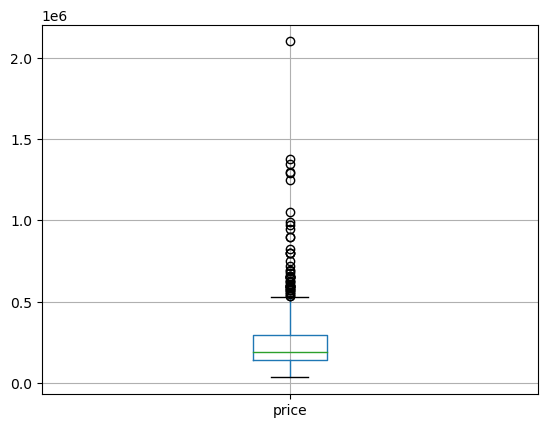

In [24]:
#Observamos posibles valores atípicos
import matplotlib.pyplot as plt
df_viviendas.boxplot(column='price')
plt.show()

In [25]:
#Éstos serían los valores atípicos
df_viviendas[df_viviendas['price']>550000]

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,House,0,No,0,0
49,Casa en venta en San Blas,970000,"Salvador, Madrid",5.0,300,3.0,Independiente (Frío / Calor),Señorial,1997.0,House,0,Independiente (Gas),1,0
75,Casa en venta en Villaviciosa De Odón,649000,Villaviciosa De Odón,4.0,450,3.0,No,Media,1980.0,House,0,No,1,0
76,Casa en venta en Calle Laurel,610000,Rivas-Vaciamadrid,5.0,580,4.0,"Independiente (Frío / Calor, A Techo)",Popular,2002.0,House,0,centralizada,1,0
85,Piso en venta en Chamberí,1300000,Madrid,6.0,227,3.0,No,Señorial,1965.0,5,0,centralizada (Radiadores),0,0
174,Piso en venta en Moncloa - Aravaca,990000,"Ciudad Universitaria, Madrid",4.0,221,4.0,No,Señorial,1975.0,24,0,centralizada (Gas),0,1
211,Piso en venta en Salamanca,2100000,"Lista, Madrid",5.0,200,2.0,No,Media,1930.0,4,0,centralizada,0,0
263,Piso en venta en Retiro,600000,Madrid,3.0,130,2.0,No,Señorial,1968.0,1,0,No,0,1
297,Piso en venta en Av. de los Toreros,559000,"Salamanca, Guindalera, Madrid",3.0,110,2.0,"Independiente (Frío / Calor, A Techo)",Media,1946.0,1,0,Independiente (Gas),0,0
361,Casa en venta en Villaviciosa De Odón,749000,Villaviciosa De Odón,5.0,404,3.0,No,Media,2000.0,House,0,No,0,0


In [26]:
#Eliminamos del DataFrame los valores atípicos
df_viviendas = df_viviendas[df_viviendas['price']<=550000]
df_viviendas.describe()

,price,rooms,surface,bathrooms,year built,building reform,garden,lift
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,217118.772215,2.872340,131.813517,1.425532,1972.941176,0.047559,0.032541,0.224030
std,100458.615223,1.013059,813.176738,0.659725,22.301203,0.212966,0.177542,0.417203
min,35000.000000,1.000000,22.000000,1.000000,1880.000000,0.000000,0.000000,0.000000
25%,139900.000000,2.000000,65.000000,1.000000,1965.000000,0.000000,0.000000,0.000000
50%,184000.000000,3.000000,83.000000,1.000000,1973.000000,0.000000,0.000000,0.000000
75%,275000.000000,3.000000,112.500000,2.000000,1986.000000,0.000000,0.000000,0.000000
max,545000.000000,11.000000,22993.000000,4.000000,2023.000000,1.000000,1.000000,1.000000


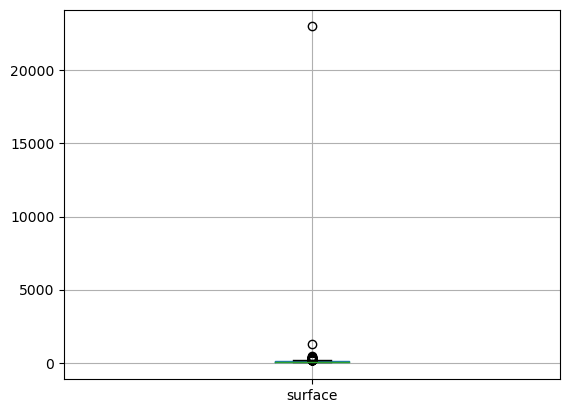

In [27]:
df_viviendas.boxplot(column='surface')
plt.show()

In [28]:
df_viviendas = df_viviendas[df_viviendas['surface']<200]

C:\Users\rafacampa9\AppData\Local\Temp\ipykernel_17240\1038053318.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_viviendas.corr()


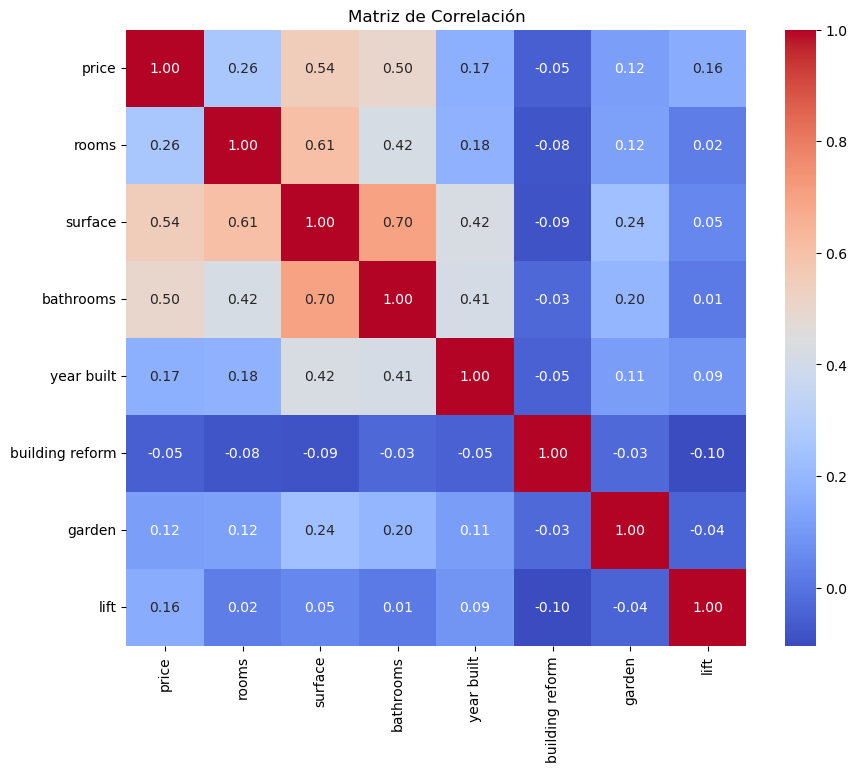

In [29]:
import seaborn as sns

# Crear el DataFrame
# (Aquí asumiré que tu DataFrame se llama df)
# Si tiene otro nombre, asegúrate de reemplazar 'df' con el nombre correcto

# Calcula la matriz de correlación
correlation_matrix = df_viviendas.corr()

# Configura la visualización
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [30]:
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 1 to 1926
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             723 non-null    object 
 1   price             723 non-null    int64  
 2   location          723 non-null    object 
 3   rooms             723 non-null    float64
 4   surface           723 non-null    int64  
 5   bathrooms         723 non-null    float64
 6   air conditioning  723 non-null    object 
 7   property type     723 non-null    object 
 8   year built        723 non-null    float64
 9   floor             723 non-null    object 
 10  building reform   723 non-null    int32  
 11  heating           723 non-null    object 
 12  garden            723 non-null    int32  
 13  lift              723 non-null    int32  
dtypes: float64(3), int32(3), int64(2), object(6)
memory usage: 76.3+ KB


In [31]:
df_viviendas.describe()

,price,rooms,surface,bathrooms,year built,building reform,garden,lift
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,204246.139696,2.733057,85.781466,1.316736,1970.827109,0.051176,0.013831,0.247580
std,92410.403949,0.846600,32.951771,0.529553,21.744531,0.220508,0.116871,0.431905
min,35000.000000,1.000000,22.000000,1.000000,1880.000000,0.000000,0.000000,0.000000
25%,137260.000000,2.000000,64.000000,1.000000,1964.000000,0.000000,0.000000,0.000000
50%,175000.000000,3.000000,79.000000,1.000000,1971.000000,0.000000,0.000000,0.000000
75%,249949.500000,3.000000,100.000000,2.000000,1980.000000,0.000000,0.000000,0.000000
max,538000.000000,6.000000,199.000000,4.000000,2023.000000,1.000000,1.000000,1.000000


In [32]:
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,No,Popular,1968.0,2,1,No,0,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,0,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,No,Popular,1974.0,3,0,Independiente (Gas),0,0
6,Piso en venta en Tetuán,305000,"Berruguete, Madrid",2.0,83,1.0,Independiente,Media,1960.0,6,0,Independiente (Gas),0,0
7,Piso en venta en Carabanchel,160000,"Puerta Bonita - Abrantes, Madrid",3.0,97,2.0,No,Popular,1986.0,3,0,Independiente (Gas),0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,Casa en venta en Reyes Catolicos - Rinconada -...,280000,"Rinconada, Alcalá De Henares",3.0,187,4.0,Independiente (Frío / Calor),Media,1997.0,House,0,Independiente (A Gasoil),0,0
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,No,Señorial,1975.0,5,0,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,No,Señorial,1975.0,3,0,No,0,0
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,No,Media,1977.0,House,0,centralizada (A Gasoil),0,0


PREPARACIÓN DE LOS DATOS
------------------------

   
   ColumnTransformer Y Pipeline
------------------------

In [33]:
#Definimos las listas numéricas y categóricas del DataFrame
numeric_list = ['surface', 'year built', 'building reform', 
                'garden', 'lift', 'rooms', 'bathrooms']

categorical_list = ['location', 'air conditioning', 'property type',
                    'floor', 'heating']

In [34]:
#Aplicamos en esta opción una reducción de dimensionalidad para ver cuál nos conviene más
df_viviendas['bathrooms_per_surface'] = df_viviendas['bathrooms']/df_viviendas['surface']
numeric_list_ii = ['surface', 'year built', 'building reform', 
                'garden', 'lift', 'bathrooms_per_surface']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [36]:
#Definimos los transformadores de ambos grupos:
numeric_transformer = Pipeline(steps = [( 'scaler', StandardScaler())]) 
categorical_transformer = Pipeline (steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [37]:
#Creamos el preprocesador
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_list),
        ('cat', categorical_transformer, categorical_list)
    ]
)

preprocessor_ii = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_list_ii),
        ('cat', categorical_transformer, categorical_list)
    ]
)

---------------------------------------------------------------------------------------------------------
SEPARACIÓN DE DATOS
------------------------
 - X: Datos sin la columna "price"
 - y: Datos con la columna "price"
 
Muestras de entrenamiento y prueba
 - X_train: grupo de entrenamiento
 - X_test: grupo de prueba
 - y_train: target para el grupo de entrenamiento
 - y_test: target para el grupo de prueba

In [38]:
#Crear X (Fuera la columna de 'price')
X = df_viviendas.drop(['price', 'bathrooms_per_surface'], axis = 1)
X_2 = df_viviendas.drop(['price', 'rooms', 'bathrooms'], axis = 1)

In [39]:
#Crear y (Valor de la columna 'price')
y = df_viviendas['price']

In [40]:
#Dividir los datos para el entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size = 0.2)

In [41]:
#Revisamos el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((578, 13), (145, 13), (578,), (145,))

In [42]:
X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape

((578, 12), (145, 12), (578,), (145,))

 --------------------------------------
 - Probamos algunos modelos
 -----------------------------------

---------------------------------------------------------------------------------------------------------
LinearRegression
-----------

In [43]:
#Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression_ii = LinearRegression()

In [44]:
#Pipeline de la predicción completa
model_linear_regression = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('linear_regression', linear_regression)
    ]
)

model_linear_regression_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('linear_regression_ii', linear_regression_ii)
    ]
)
    

In [45]:
#Entrenamos el modelo
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift', 'rooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('linear_regression', LinearRegression())])

In [46]:
model_linear_regression_ii.fit(X_2_train, y_2_train)

Pipeline(steps=[('preprocessor_ii',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift',
                                                   'bathrooms_per_surface']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('linear_regression_ii', LinearRegression())])

In [47]:
#Realizamos las predicciones
predictions = model_linear_regression.predict(X_test)

In [48]:
#Vemos las predicciones
predictions

array([128358.42823967, 225782.86923377, 337359.2126847 , 113674.03191801,
       138509.99392682, 328258.98158888, 249805.44904762,  74643.62835521,
       314537.88939365, 300808.87431377,  44165.15088841, 124838.3605656 ,
       408771.36485175,  99097.04225003, 117458.02607031, 379936.46667935,
       120080.90293629, 206196.93347009, 290366.0398218 , 111755.82416336,
        41433.89521029, 140891.13449565, 313308.49266251, 175750.76801069,
       133747.4100589 , 122338.47149215, 200082.75770362, 103411.41849597,
       371637.10369636, 174777.39840586, 279368.02278653, 166662.3546924 ,
       169754.3640318 , 336325.39847736, 137545.3959949 , 145549.14261619,
       -12351.95611973, 252092.9765954 , 215050.77316209, 244600.56199231,
       300751.63130155, 339297.57365107, 325574.62108907, 146245.04358125,
       333215.99506766, 123894.08338982, 331455.6417373 , 212316.00877216,
       127259.88183591, 383563.8297945 ,  98144.08628181, 164081.90190771,
       109154.1932471 , 2

In [49]:
predictions_ii = model_linear_regression_ii.predict(X_2_test)
predictions_ii

array([370632.91566056, 213266.20412768, 157322.88639568, 135409.43138213,
       142767.79207716, 216230.81511071,  53905.87865935,  86687.27081918,
       103064.86484785, 177861.81851637, 295540.37781951, 183271.49531804,
       106057.53245028, 163356.98302045, 374923.43586625, 140791.75789029,
       366113.85222965, 121291.38623383,  85836.06056777, 233364.2580725 ,
       245018.59892344, 241226.77008095, 369942.24873341, 176333.97908933,
       125583.5654507 ,  98986.30210394, 167869.8954347 , 323129.60186763,
        58292.94433051, 226476.7463229 , 208364.0537185 , 161887.41914231,
       294410.19224803, 119606.06036133, 161824.06660689, 293012.1854185 ,
       142219.20614273, 107819.40818468, 195161.32918231, 196021.98001189,
       170801.12028712, 330384.56193033, 163213.48056578, 210107.65091876,
       387319.88916109, 170496.15494646, 184010.27925236, 135577.1464227 ,
       120504.39061292, 233800.49565138, 231022.49650458, 401639.42860849,
       182893.8806842 , 1

-------------------------------------------------------------------------------------------------------------------
CROSS VALIDATION
------------------------
La validación cruzada o cross validation (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de muestreo utilizado para evaluar un modelo si tenemos datos ilimitados.

Una manera de obtener las muestras es a través del método del k-fold, el cual divide a los datos en k muestras.

In [50]:
#Evaluamos el modelo usando crossvalidation
from sklearn.model_selection import cross_val_score

In [51]:
def crossvalue(model, X):
    return cross_val_score(
        model, X, y, scoring = 'neg_mean_squared_error', cv = 10
    )

In [52]:
linear_scores = crossvalue(model_linear_regression, X)
print(linear_scores)
print()
linear_scores_ii = crossvalue(model_linear_regression_ii, X_2)
print(linear_scores_ii)

[-3.63194952e+09 -4.63927644e+09 -3.57267758e+09 -3.08191978e+09
 -4.05858946e+09 -1.89129461e+09 -2.85858821e+09 -4.62077859e+09
 -3.10148063e+09 -3.80822587e+09]

[-3.71226230e+09 -4.36893524e+09 -3.58968621e+09 -3.02823733e+09
 -4.01158100e+09 -1.79971393e+09 -2.76598366e+09 -4.91331419e+09
 -3.13694407e+09 -3.65478474e+09]


In [53]:
#Cambiamos el signo y sacamos la raíz
import numpy as np
linear_rmse_scores = np.sqrt(-linear_scores)
print(linear_rmse_scores)

linear_rmse_scores_ii = np.sqrt(-linear_scores_ii)
print(linear_rmse_scores_ii)

[60265.65792084 68112.23410783 59771.87948255 55515.04102689
 63707.05972086 43489.01710244 53465.76674194 67976.30906815
 55690.93853564 61710.82459156]
[60928.33737318 66097.92161854 59913.99006551 55029.42240487
 63337.04287436 42423.03531236 52592.61983872 70095.03683231
 56008.42854658 60454.81565986]


In [54]:
#Definimos una función que nos devuelva el score, mean y standard deviation

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [55]:
display_scores(linear_rmse_scores)
print()
display_scores(linear_rmse_scores_ii)

Scores: [60265.65792084 68112.23410783 59771.87948255 55515.04102689
 63707.05972086 43489.01710244 53465.76674194 67976.30906815
 55690.93853564 61710.82459156]
Mean: 58970.47282986948
Standard Deviation: 6997.242603322094

Scores: [60928.33737318 66097.92161854 59913.99006551 55029.42240487
 63337.04287436 42423.03531236 52592.61983872 70095.03683231
 56008.42854658 60454.81565986]
Mean: 58688.06505262999
Standard Deviation: 7338.616060595554


------------------------------------------------------------------------------------------------------------
DecisionTree
-----------------------

In [56]:
#Aplicar el modelo de árboles de decisión con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg_ii = DecisionTreeRegressor(random_state=42)

#2. Definir el Pipeline: Transformación + modelo
model_tree_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('tree_reg', tree_reg)
    ]
)

model_tree_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('tree_reg_ii', tree_reg_ii)
    ]
)

#3. Ajustar el modelo
model_tree_reg.fit(X_train, y_train)
model_tree_reg_ii.fit(X_2_train, y_2_train)

Pipeline(steps=[('preprocessor_ii',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift',
                                                   'bathrooms_per_surface']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('tree_reg_ii', DecisionTreeRegressor(random_state=42))])

In [57]:
#Evaluación
#4. Calcular el score con la validación cruzada CV = 10
tree_reg_scores = crossvalue(model_tree_reg, X)

tree_reg_scores_ii = crossvalue(model_tree_reg_ii, X_2)

#5. Realizar el cambio de signo y sacar la raíz
tree_rmse_scores = np.sqrt(-tree_reg_scores)
tree_rmse_scores_ii = np.sqrt(-tree_reg_scores_ii)

#6. Mostrar el resultado usando la función display_scores
display_scores(tree_rmse_scores)
print()
display_scores(tree_rmse_scores)

Scores: [85614.3768735  90725.05602327 91949.11018847 77357.54966065
 86299.9549781  78027.42339342 84500.50112458 85677.89440876
 92722.21617425 82502.00847757]
Mean: 85537.60913025848
Standard Deviation: 5038.342991176688

Scores: [85614.3768735  90725.05602327 91949.11018847 77357.54966065
 86299.9549781  78027.42339342 84500.50112458 85677.89440876
 92722.21617425 82502.00847757]
Mean: 85537.60913025848
Standard Deviation: 5038.342991176688


----------------------------------------------------------------------------------------------------------------
RandomForestRegressor
-------------------------------

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#1. Nombrar una variable para nuestro modelo
forest_reg =RandomForestRegressor(n_estimators = 10, random_state=42)
forest_reg_ii =RandomForestRegressor(n_estimators = 10, random_state=42)

#2. Definir el Pipeline de Transformación + modelo
model_forest_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('forest_reg',forest_reg)
    ]
)

model_forest_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('forest_reg_ii', forest_reg_ii)
    ]
)

#3. Ajustar el modelo
model_forest_reg.fit(X_train, y_train)
model_forest_reg_ii.fit(X_2_train, y_2_train)

Pipeline(steps=[('preprocessor_ii',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift',
                                                   'bathrooms_per_surface']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('forest_reg_ii',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [60]:
#Evaluación
#4. Calcular el score con la validación cruzada CV = 10
forest_reg_scores = crossvalue(model_forest_reg, X)

forest_reg_scores_ii = crossvalue(model_forest_reg_ii, X_2)

#5. Realizar el cambio de signo y sacar la raíz
forest_rmse_scores = np.sqrt(-forest_reg_scores)
forest_rmse_scores_ii = np.sqrt(-forest_reg_scores_ii)

#6. Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores)
print()
display_scores(forest_rmse_scores_ii)

Scores: [73681.0778276  74167.05036237 65262.75095159 67122.53180489
 83883.77598203 50898.40376733 60328.02566087 66489.48597629
 64836.01548472 60341.3957531 ]
Mean: 66701.05135707965
Standard Deviation: 8580.569651977155

Scores: [72479.12327159 71536.05905134 63895.73304237 66148.52023352
 87498.45446293 53925.20595663 57071.48083966 71745.36037133
 66947.00215714 63026.37074266]
Mean: 67427.33101291546
Standard Deviation: 8872.177564703952


--------------------------------------------------------------------------------------------------------
Ridge
------------------------------------------------------------------

In [61]:
from sklearn.linear_model import Ridge

# 1. Nombrar una variable para nuestro modelo (Ridge Regression)
ridge_reg = Ridge(alpha=0.001, random_state=42)  
ridge_reg_ii = Ridge(alpha=0.001, random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_ridge_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('rigde_reg', ridge_reg)
    ]
)

model_ridge_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('ridge_reg_ii', ridge_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_ridge_reg.fit(X_train, y_train)
model_ridge_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
ridge_reg_scores = crossvalue(model_ridge_reg, X)

ridge_reg_scores_ii = crossvalue(model_ridge_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)
ridge_rmse_scores_ii = np.sqrt(-ridge_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(ridge_rmse_scores)
print()
display_scores(ridge_rmse_scores_ii)


Scores: [60264.34721963 67937.40983539 59741.52075694 55475.13030506
 63704.85997416 43496.58148331 53457.17304621 67969.22580525
 55643.41214678 61697.47468323]
Mean: 58938.71352559505
Standard Deviation: 6975.797835987538

Scores: [60915.12814351 65948.5019278  59895.26935921 54994.16897408
 63332.1689344  42409.17714324 52592.42664616 70083.34539327
 55995.46180452 60438.18131845]
Mean: 58660.38296446348
Standard Deviation: 7325.71112163671


---------------------------------------------------------------------------------------------------
PolynomialFeatures
---------------------------------------------------------------------------------------------------

In [62]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

# 1. Crear el modelo de regresión polinómica
degree = 2  # Grado del polinomio
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_ii = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 2. Definir el Pipeline de Transformación + modelo
model_poly_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('poly_reg', polyreg)
    ]
)
model_poly_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('poly_reg_ii', polyreg_ii)
    ]
)

# 3. Ajustar el modelo
model_poly_reg.fit(X_train, y_train)
model_poly_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
poly_reg_scores = crossvalue(model_poly_reg, X)
poly_reg_scores_ii = crossvalue(model_poly_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
poly_rmse_scores = np.sqrt(-poly_reg_scores)
poly_rmse_scores_ii = np.sqrt(-poly_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(poly_rmse_scores)
print()
display_scores(poly_rmse_scores_ii)

Scores: [138491.07471676 119320.03552752 140658.90083417 119873.85335655
 145310.44113588 122749.66198125  99494.23123673 130151.16657415
 105368.11658188 147578.06380731]
Mean: 126899.55457522071
Standard Deviation: 15618.908994440702

Scores: [140977.18879591 111233.67547017 121453.49339931 111984.3581128
 192106.8266331  117134.40450462 113597.86758622 161385.15295128
 103401.12354237 123496.57332695]
Mean: 129677.06643227322
Standard Deviation: 26259.9902888227


--------------------------------------------------------------------------------------------------------
SVR
----------------------

In [63]:
from sklearn.svm import SVR

# 1. Crear el modelo de Regresión de Máquinas de Vectores de Soporte (SVR)
svr_reg = SVR()
svr_reg_ii = SVR()

# 2. Definir el Pipeline de Transformación + modelo
model_svr_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('svr_reg', svr_reg)
    ]
)
model_svr_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('svr_reg_ii', svr_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_svr_reg.fit(X_train, y_train)
model_svr_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
svr_reg_scores = crossvalue(model_svr_reg, X)
svr_reg_scores_ii = crossvalue(model_svr_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
svr_rmse_scores = np.sqrt(-svr_reg_scores)
svr_rmse_scores_ii = np.sqrt(-svr_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(svr_rmse_scores)
print()
display_scores(svr_rmse_scores_ii)

Scores: [104926.53409745 101084.05817227  88150.11931026  99943.07913158
 118229.16409227  82669.95484726  86039.59775629  98401.16189707
  78562.06123227 106919.3609293 ]
Mean: 96492.50914660339
Standard Deviation: 11748.994376871538

Scores: [104930.21013279 101086.56662653  88152.38381387  99944.62478613
 118233.02986172  82669.40893108  86040.13887314  98407.54888328
  78567.25475132 106925.18372203]
Mean: 96495.6350381874
Standard Deviation: 11749.800267645713


----------------------------------------------------------------------------------------------------
GradientBoostingRegressor
----------------

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Crear el modelo de Regresión de Gradiente Descendente
gradient_reg = GradientBoostingRegressor(random_state=42)
gradient_reg_ii = GradientBoostingRegressor(random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_gradient_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('gradient_reg', gradient_reg)
    ]
)
model_gradient_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('gradient_reg_ii', gradient_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_gradient_reg.fit(X_train, y_train)
model_gradient_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
gradient_reg_scores = crossvalue(model_gradient_reg, X)
gradient_reg_scores_ii = crossvalue(model_gradient_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
gradient_rmse_scores = np.sqrt(-gradient_reg_scores)
gradient_rmse_scores_ii = np.sqrt(-gradient_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(gradient_rmse_scores)
print()
display_scores(gradient_rmse_scores_ii)

Scores: [67075.294998   73871.99678106 68133.76424281 58356.39574475
 72744.47551923 49721.9268831  57608.53470976 65733.79594729
 58733.86258958 65979.18421592]
Mean: 63795.923163150124
Standard Deviation: 7150.321925543034

Scores: [68832.00255189 73635.78641532 68282.72405544 58210.75603769
 71293.70636031 47081.56957258 57597.19093219 66986.80872487
 60548.31811941 67661.05773891]
Mean: 64012.99205086245
Standard Deviation: 7633.596099135223


----------------------------------------------------------------------------------------------------------------
KNeighborsRegressor
-----------

In [65]:
from sklearn.neighbors import KNeighborsRegressor

# 1. Crear el modelo de Regresión de Vecinos Más Cercanos
knn_reg = KNeighborsRegressor()
knn_reg_ii = KNeighborsRegressor()

# 2. Definir el Pipeline de Transformación + modelo
model_knn_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('knn_reg', knn_reg)
    ]
)
model_knn_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('knn_reg_ii', knn_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_knn_reg.fit(X_train, y_train)
model_knn_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
knn_reg_scores = crossvalue(model_knn_reg, X)
knn_reg_scores_ii = crossvalue(model_knn_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
knn_rmse_scores = np.sqrt(-knn_reg_scores)
knn_rmse_scores_ii = np.sqrt(-knn_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(knn_rmse_scores)
print()
display_scores(knn_rmse_scores_ii)

Scores: [88723.09023531 79613.11433895 74833.167463   74831.80404471
 95464.69858813 66569.15810241 71736.37826016 79027.56850463
 66349.64916583 82214.5853461 ]
Mean: 77936.32140492278
Standard Deviation: 8758.27978630154

Scores: [84574.66693461 79926.44298585 67498.69028442 76974.40276819
 87787.91015662 70089.5029644  70067.24763636 77983.93649172
 60700.11887816 82103.86610303]
Mean: 75770.67852033624
Standard Deviation: 8037.4349839425095


--------------------------------------------------------------------------------------------------------
MLPRegressor
----------

In [66]:
from sklearn.neural_network import MLPRegressor

# 1. Crear el modelo de Regresión de Redes Neuronales
nn_reg = MLPRegressor(random_state=42)
nn_reg_ii = MLPRegressor(random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_nn_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('nn_reg', nn_reg)
    ]
)
model_nn_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('knn_reg_ii', knn_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_nn_reg.fit(X_train, y_train)
model_nn_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
nn_reg_scores = crossvalue(model_nn_reg, X)
nn_reg_scores_ii = crossvalue(model_nn_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
nn_rmse_scores = np.sqrt(-nn_reg_scores)
nn_rmse_scores_ii = np.sqrt(-nn_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(nn_rmse_scores)
print()
display_scores(nn_rmse_scores)

C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\skle

Scores: [231260.83968784 230303.97470127 212844.62924727 224624.40235969
 248901.93442233 216946.9765714  212077.52660879 217568.09820811
 201057.85795046 236175.66137466]
Mean: 223176.19011318294
Standard Deviation: 13185.068294335015

Scores: [231260.83968784 230303.97470127 212844.62924727 224624.40235969
 248901.93442233 216946.9765714  212077.52660879 217568.09820811
 201057.85795046 236175.66137466]
Mean: 223176.19011318294
Standard Deviation: 13185.068294335015


--------------------------------------------------------------------------------------------
Lasso
-------

In [67]:
from sklearn.linear_model import Lasso

# 1. Crear el modelo de Regresión de Lasso
lasso_reg = Lasso(alpha=1.5, random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_lasso_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('lasso_reg', lasso_reg)
    ]
)

# 3. Ajustar el modelo
model_lasso_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
lasso_reg_scores = crossvalue(model_lasso_reg, X)

# 5. Realizar el cambio de signo y sacar la raíz
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(lasso_rmse_scores)
print()
#------------------------------------------------------------------------------------------------------------------------------
# 1. Crear el modelo de Regresión de Lasso
lasso_reg_ii = Lasso(alpha=1.5, random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_lasso_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('lasso_reg_ii', lasso_reg_ii)
    ]
)

# 3. Ajustar el modelo
model_lasso_reg_ii.fit(X_2_train, y_2_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
lasso_reg_scores_ii = crossvalue(model_lasso_reg_ii, X_2)

# 5. Realizar el cambio de signo y sacar la raíz
lasso_rmse_scores_ii = np.sqrt(-lasso_reg_scores_ii)

# 6. Mostrar el resultado usando la función display_scores
display_scores(lasso_rmse_scores_ii)


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8741364600.419678, tolerance: 551575590.0817121
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39657722601.33179, tolerance: 573055871.6577994
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917189643.3094482, tolerance: 549388997.4595957
  model = cd_fast.sparse_enet_coordinate_descent(


Scores: [59268.90995722 66056.28188361 61725.91515497 55428.63934223
 62439.93262633 41860.170118   54030.61128471 68225.24364237
 55364.56512836 61965.58124712]
Mean: 58636.585038491605
Standard Deviation: 7114.392881933669



C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33915463386.423462, tolerance: 573055871.6577994
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2977868926.294922, tolerance: 570318735.1758147
  model = cd_fast.sparse_enet_coordinate_descent(


Scores: [59980.23339276 64153.62176906 61607.87481577 55056.73600627
 62042.69543197 40948.5933732  53144.95289687 70420.90456437
 55672.83387592 60685.25229537]
Mean: 58371.369842156106
Standard Deviation: 7481.037910146806


-------------------------------------------------------------------------------------------------------
Comparamos todos los resultados obtenidos:
-------------

In [68]:
print('Lasso')
print(display_scores(lasso_rmse_scores))
print(display_scores(lasso_rmse_scores_ii))
print('----------------------------------------------')
print('KNeighborsRegressor')
print(display_scores(knn_rmse_scores))
print(display_scores(knn_rmse_scores_ii))
print('----------------------------------------------')
print('MLPRegressor')
print(display_scores(nn_rmse_scores))
print(display_scores(nn_rmse_scores_ii))
print('----------------------------------------------')
print('GradientBoostingRegressor')
print(display_scores(gradient_rmse_scores))
print(display_scores(gradient_rmse_scores_ii))
print('----------------------------------------------')
print('SVR')
print(display_scores(svr_rmse_scores))
print(display_scores(svr_rmse_scores_ii))
print('----------------------------------------------')
print('PolynomialFeatures')
print(display_scores(poly_rmse_scores))
print(display_scores(poly_rmse_scores_ii))
print('----------------------------------------------')
print('Ridge')
print(display_scores(ridge_rmse_scores))
print(display_scores(ridge_rmse_scores_ii))
print('----------------------------------------------')
print('RandomForestRegressor')
print(display_scores(forest_rmse_scores))
print(display_scores(forest_rmse_scores_ii))
print('----------------------------------------------')
print('DecisionTreeRegressor')
print(display_scores(tree_rmse_scores))
print(display_scores(tree_rmse_scores_ii))
print('----------------------------------------------')
print('LinearRegression')
print(display_scores(linear_rmse_scores))
print(display_scores(linear_rmse_scores_ii))
print('----------------------------------------------')

Lasso
Scores: [59268.90995722 66056.28188361 61725.91515497 55428.63934223
 62439.93262633 41860.170118   54030.61128471 68225.24364237
 55364.56512836 61965.58124712]
Mean: 58636.585038491605
Standard Deviation: 7114.392881933669
None
Scores: [59980.23339276 64153.62176906 61607.87481577 55056.73600627
 62042.69543197 40948.5933732  53144.95289687 70420.90456437
 55672.83387592 60685.25229537]
Mean: 58371.369842156106
Standard Deviation: 7481.037910146806
None
----------------------------------------------
KNeighborsRegressor
Scores: [88723.09023531 79613.11433895 74833.167463   74831.80404471
 95464.69858813 66569.15810241 71736.37826016 79027.56850463
 66349.64916583 82214.5853461 ]
Mean: 77936.32140492278
Standard Deviation: 8758.27978630154
None
Scores: [84574.66693461 79926.44298585 67498.69028442 76974.40276819
 87787.91015662 70089.5029644  70067.24763636 77983.93649172
 60700.11887816 82103.86610303]
Mean: 75770.67852033624
Standard Deviation: 8037.4349839425095
None
---------

Fine tune al modelo Lasso
---------

Usamos RandomizedSearchCV
-----------

In [69]:
#Probamos con distintas combinaciones para ver cuál es la mejor
from scipy.stats import uniform

alpha = uniform(loc=0, scale = 3) 
copy_X = [True, False]
fit_intercept = [True, False]
max_iter = [int(x) for x in range (100, 1000)]
positive = [True, False]
precompute = [True, False]
random_state = [None, 42, 2023]
selection = ['cyclic', 'random']
tol = uniform(loc = 0.001, scale = 0.1)
warm_start = [True, False]

params_grid = {
    'lasso_reg_ii__alpha': alpha,
    'lasso_reg_ii__copy_X': copy_X,
    'lasso_reg_ii__fit_intercept': fit_intercept,
    'lasso_reg_ii__max_iter': max_iter,
    'lasso_reg_ii__positive': positive,
    'lasso_reg_ii__precompute': precompute,
    'lasso_reg_ii__random_state': random_state,
    'lasso_reg_ii__selection': selection,
    'lasso_reg_ii__tol': tol,
    'lasso_reg_ii__warm_start': warm_start
}

                                            

In [70]:
from sklearn.model_selection import RandomizedSearchCV

gridRandom_lasso = RandomizedSearchCV(
    estimator = model_lasso_reg_ii,
    param_distributions = params_grid,
    n_iter = 500,
    cv = 10,
    n_jobs = -1,
    verbose = 2
)

gridRandom_lasso.fit(X_2,y)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor_ii',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['surface',
                                                                                'year '
                                                                                'built',
                                                                                'building '
                                                                                'reform',
                                                                                'garden',
                                                                                'lift',
                                                                                'bathrooms_per_surface']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['location',
                                                                                'air '
                                                                                'conditioning',
                                                                                'p...
                                                                   124, 125,
                                                                   126, 127,
                                                                   128, 129, ...],
                                        'lasso_reg_ii__positive': [True, False],
                                        'lasso_reg_ii__precompute': [True,
                                                                     False],
                                        'lasso_reg_ii__random_state': [None, 42,
                                                                       2023],
                                        'lasso_reg_ii__selection': ['cyclic',
                                                                    'random'],
                                        'lasso_reg_ii__tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000168D6F2B0D0>,
                                        'lasso_reg_ii__warm_start': [True,
                                                                     False]},
                   verbose=2)

In [71]:
gridRandom_lasso.best_params_

{'lasso_reg_ii__alpha': 2.284539837681833,
 'lasso_reg_ii__copy_X': True,
 'lasso_reg_ii__fit_intercept': True,
 'lasso_reg_ii__max_iter': 235,
 'lasso_reg_ii__positive': True,
 'lasso_reg_ii__precompute': False,
 'lasso_reg_ii__random_state': 42,
 'lasso_reg_ii__selection': 'cyclic',
 'lasso_reg_ii__tol': 0.09782533657985176,
 'lasso_reg_ii__warm_start': False}

In [74]:
#Ajusto el modelo con los nuevos parámetros
lasso_reg_ii = Lasso(
    alpha = 2.284539837681833,
    copy_X = True,
    fit_intercept = True,
    max_iter = 235,
    positive = True,
    precompute = False,
    random_state = 42,
    selection = 'cyclic',
    tol = 0.09782533657985176,
    warm_start = False
)

#Defino el Pipeline: Transformación + modelo
model_lasso_reg_ii = Pipeline(
    steps = [
        ('preprocessor_ii', preprocessor_ii),
        ('lasso_reg_ii', lasso_reg_ii)
    ]
)

#Ajustar el modelo
model_lasso_reg_ii.fit(X_2_train, y_2_train)

#Evaluación
#Calcular el score con la validación cruzada CV = 10
lasso_reg_scores_ii = crossvalue(model_lasso_reg_ii, X_2)

#Realizar el cambio de signo y sacar la raíz
lasso_rmse_scores_ii = np.sqrt(-lasso_reg_scores_ii)

#Mostrar el resultado usando la función display_scores
display_scores(lasso_rmse_scores_ii)

Scores: [58877.81586803 56417.13022898 64639.038972   57632.91419928
 59509.98841922 40562.75960519 55681.10939655 70168.23969087
 53931.90034573 63055.74947003]
Mean: 58047.66461958767
Standard Deviation: 7411.8531733038535


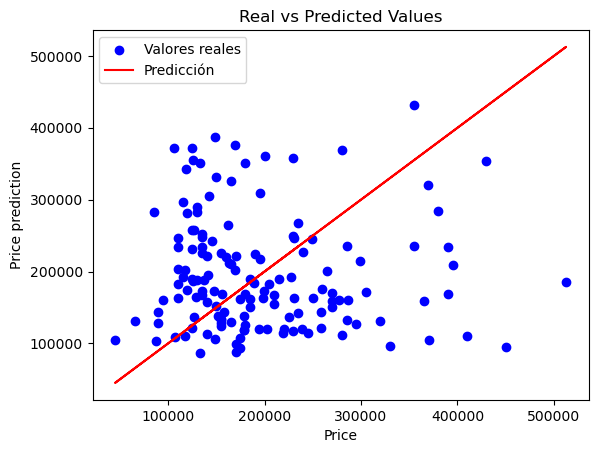

In [75]:
import matplotlib.pyplot as plt

# Realizar las predicciones con el modelo ajustado
predictions = model_lasso_reg_ii.predict(X_2_test)

# Graficar los valores reales como puntos
plt.scatter(y_test, predictions, color='blue', label='Valores reales')

# Graficar la función de predicción (línea de 45 grados, donde valores reales = valores predichos)
plt.plot(y_test, y_test, color='red', label='Predicción')

# Personalizar el gráfico
plt.xlabel('Price')
plt.ylabel('Price prediction')
plt.title('Real vs Predicted Values')
plt.legend()

# Mostrar el gráfico
plt.show()